In [1]:
import os

from IPython import display
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

import tensorflow as tf

Defining our classes

In [2]:
classes={'Transistor':0,'Resistor':1,'Capacitor':2,'LED':3,'Chip':4,'Misc':5}

Getting path list for each class

In [3]:
import pathlib
dataset_dir = pathlib.Path("dataset")

Trans_paths = list(dataset_dir.glob("Transistors/*"))
Res_paths = list(dataset_dir.glob("Resistors/*"))
LED_paths = list(dataset_dir.glob("LEDs/*"))
Cap_paths = list(dataset_dir.glob("Capacitors/*"))
Chip_paths = list(dataset_dir.glob("Chips/*"))
Misc_paths = list(dataset_dir.glob("Misc/*"))

In [4]:
Trans_paths

[WindowsPath('dataset/Transistors/transistor (1).jpeg'),
 WindowsPath('dataset/Transistors/transistor (1).jpg'),
 WindowsPath('dataset/Transistors/transistor (1).png'),
 WindowsPath('dataset/Transistors/transistor (10).jpg'),
 WindowsPath('dataset/Transistors/transistor (11).jpg'),
 WindowsPath('dataset/Transistors/transistor (12).jpg'),
 WindowsPath('dataset/Transistors/transistor (13).jpg'),
 WindowsPath('dataset/Transistors/transistor (14).jpg'),
 WindowsPath('dataset/Transistors/transistor (15).jpg'),
 WindowsPath('dataset/Transistors/transistor (16).jpg'),
 WindowsPath('dataset/Transistors/transistor (17).jpg'),
 WindowsPath('dataset/Transistors/transistor (18).jpg'),
 WindowsPath('dataset/Transistors/transistor (19).jpg'),
 WindowsPath('dataset/Transistors/transistor (2).jpg'),
 WindowsPath('dataset/Transistors/transistor (2).png'),
 WindowsPath('dataset/Transistors/transistor (20).jpg'),
 WindowsPath('dataset/Transistors/transistor (21).jpg'),
 WindowsPath('dataset/Transistors/t

Creating dataframes for each class

In [5]:
Trans_data = pd.DataFrame({'path': [i for i in Trans_paths], 'class': [classes['Transistor'] for i in range(len(Trans_paths))]})
Res_data = pd.DataFrame({'path': [i for i in Res_paths], 'class': [classes['Resistor'] for i in range(len(Res_paths))]})
LED_data = pd.DataFrame({'path': [i for i in LED_paths], 'class': [classes['LED'] for i in range(len(LED_paths))]})
Cap_data = pd.DataFrame({'path': [i for i in Cap_paths], 'class': [classes['Capacitor'] for i in range(len(Cap_paths))]})
Chip_data = pd.DataFrame({'path': [i for i in Chip_paths], 'class': [classes['Chip'] for i in range(len(Chip_paths))]})
Misc_data = pd.DataFrame({'path': [i for i in Misc_paths], 'class': [classes['Misc'] for i in range(len(Misc_paths))]})


In [6]:
Trans_data

,path,class
0,dataset\Transistors\transistor (1).jpeg,0
1,dataset\Transistors\transistor (1).jpg,0
2,dataset\Transistors\transistor (1).png,0
3,dataset\Transistors\transistor (10).jpg,0
4,dataset\Transistors\transistor (11).jpg,0
...,...,...
95,dataset\Transistors\transistor (91).jpg,0
96,dataset\Transistors\transistor (92).jpg,0
97,dataset\Transistors\transistor (93).jpg,0
98,dataset\Transistors\Transistor_1.jpg,0


Making final dataframe

In [7]:
final_data = pd.concat([Trans_data,Res_data,LED_data,Cap_data,Chip_data,Misc_data], axis=0).reset_index(drop=True)

In [8]:
final_data.sample(5)

,path,class
359,dataset\Capacitors\E_capacitor (65).jpg,2
110,dataset\Resistors\Resistor_19.jpg,1
203,dataset\LEDs\Led_14.jpg,3
373,dataset\Capacitors\E_capacitor (78).jpg,2
511,dataset\Misc\photo-1516747773440-e114ee0d3c07.jpg,5


Creating the feature and label array

In [9]:
import cv2
import PIL

In [10]:
X=[] #Feature list
Y=[] #Label

for i, j in zip(final_data['path'], final_data['class']):
    img = cv2.imread(str(i))
    resized_img = cv2.resize(img, (128,128))
    X.append(resized_img)
    Y.append(int(j))


In [11]:
X=np.array(X)
Y=np.array(Y)

In [12]:
X.shape

(597, 128, 128, 3)

In [13]:
Y.shape

(597,)

Showing Data


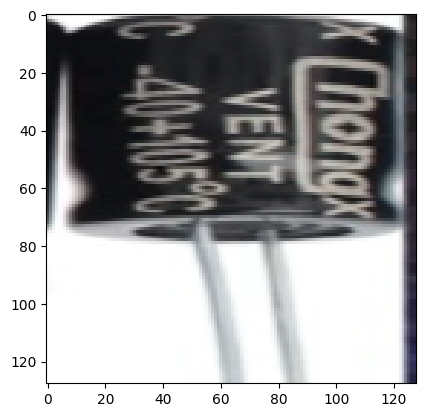

In [14]:
from matplotlib import pyplot as plt
plt.imshow(X[303], interpolation='nearest')
plt.show()

In [15]:
Y[303]

2

Saving our arrays

In [16]:
np.savez('Preprocessed_data',X,Y)